<a href="https://colab.research.google.com/github/viett887g/danhgiahieuna_ng2/blob/main/danhgiahieunang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score#"Do R2"
from sklearn.metrics import mean_absolute_error #"do MAE"
from sklearn.metrics import mean_squared_log_error #do Mean squared logarithmic error"
from sklearn.metrics import mean_absolute_percentage_error#"Mean absolute percentage error"


In [ ]:
def readData(folder, filename):
    D = np.loadtxt(os.path.join(folder, filename), delimiter=',')# đọc dữ liệu
    X, y = D[:,:-1], D[:,-1]
    X, y = scaleData(X, y)
    x0 = np.ones((X.shape[0], 1))
    X = np.column_stack([x0, X])
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=15)#huán luyện dữ liệu
    y_train = np.reshape(y_train, (y_train.shape[0], 1))#chuyển y thành ma trận mới
    y_test = np.reshape(y_test, (y_test.shape[0], 1))
    return X_train, X_test, y_train, y_test

dùng để append kết quả dự đoán vào thành 1 ma trận

In [ ]:
def featureVectorScaling(data):
    avg = np.mean(data)
    sln = data.max()
    snn = data.min()
    data_scl = (data - avg)/(sln - snn)
    return data_scl

def scaleData(X, y):
    X_scl = X[:, 0]
    for i in range(1, X.shape[1]):
        scl = featureVectorScaling(X[:, i])
        X_scl = np.column_stack([X_scl, scl])
    y_scl = featureVectorScaling(y)
    return X_scl, y_scl


ta dùng để dự đoán kết quả đầu ra và kết quả thực tế 
và loss_function = e sao cho e nhỏ nhất có thể

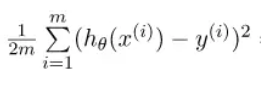

In [ ]:
def computeLoss(X, y, w):
    m = y.shape[0]
    J = 0
    h = np.dot(X, w)
    J = (1/(2*m))*np.sum(np.square(h - y))
    return J

In [ ]:
def gradientDescent(X, y, w, alpha, n):
    m = y.shape[0]
    J_history = []
    w_optimal = w.copy()
    for i in range(n):
        h = np.dot(X, w_optimal)
        error = h - y
        w_optimal = w_optimal - (alpha/m)*np.dot(X.T, error)
        J_history.append(computeLoss(X, y, w_optimal))
    return w_optimal, J_history

y_hat la ket qua dau ra du doan

y la ket qua dau ra 

phương pháp tính giá trị trung bình tổng bình phương sai số -cũng giống như hàm loss ta kì vọng sao cho trung bình tổng bình phương sai số này nhỏ nhất có thể

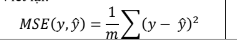

In [223]:
def mse(y, y_hat):
    m = y.shape[0]
    result = (1/m)*np.sum(np.square(y - y_hat))
    return result

Hàm r2_score tính toán hệ số xác định, thường được ký hiệu là R ^ 2.

Nó đại diện cho tỷ lệ phương sai (của y) đã được giải thích bởi các biến độc lập trong mô hình. Nó cung cấp một dấu hiệu về mức độ phù hợp và do đó là thước đo về mức độ tốt của các mẫu không nhìn thấy được mô hình dự đoán, thông qua tỷ lệ của phương sai được giải thích.

Vì phương sai như vậy phụ thuộc vào tập dữ liệu, có thể không có ý nghĩa so sánh giữa các tập dữ liệu khác nhau. Điểm tốt nhất có thể là 1,0 và nó có thể là tiêu cực (vì mô hình có thể xấu hơn một cách tùy ý). Một mô hình không đổi luôn dự đoán giá trị kỳ vọng (trung bình) của y, không tính đến các tính năng đầu vào, sẽ nhận được điểm là 0,0

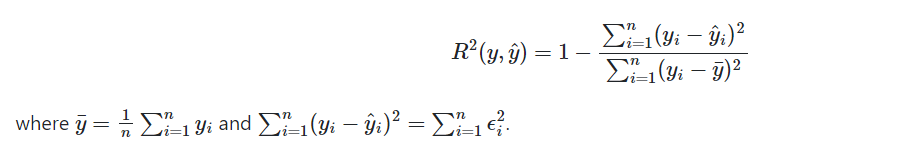

In [ ]:
def r2score(y,y_hat):
  #ln=1-(np.sum(np.square(y_test-y_hat))/(np.sum(np.square(y_test-(y_test+y_hat)/2))))
  ln=r2_score(y, y_hat)
  return ln

Hàm mean_absolute_error tính toán lỗi tuyệt đối trung bình, số liệu rủi ro tương ứng với giá trị dự kiến ​​của tổn thất lỗi tuyệt đối hoặc l1-norm loss

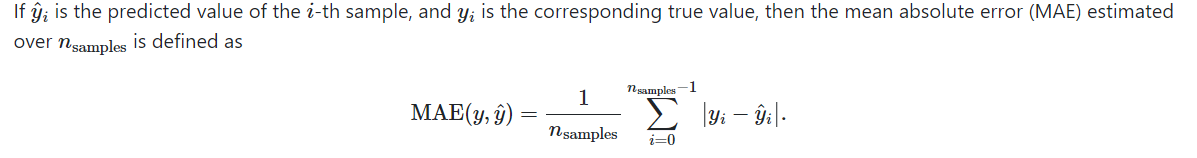

In [225]:
def mean_absolute_error_fuc(y ,y_hat):
  m=y.shape[0]
  ea=(1/m)*np.sum(np.abs(y-y_hat))
  return ea


Hàm mean_squared_log_error tính toán một số liệu rủi ro tương ứng với giá trị dự kiến ​​của lỗi hoặc tổn thất logarit bình phương (bậc hai).

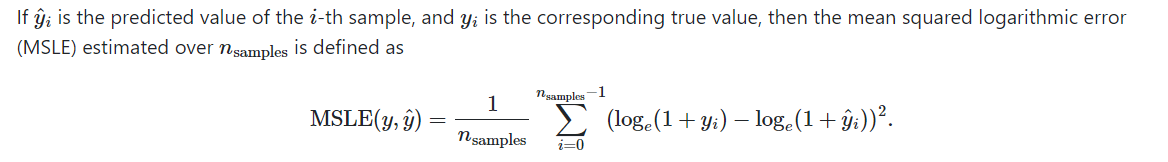

In [213]:
def Mean_squared(y,y_hat):
  #?????
  ve=mean_squared_log_error(y, y_hat)
  return ve

Giá trị trung bình_độ_độ_độ_trung_hình (MAPE), còn được gọi là độ lệch phần trăm tuyệt đối trung bình (MAPD), là một số liệu đánh giá cho các vấn đề hồi quy. Ý tưởng của số liệu này là nhạy cảm với các lỗi tương đối. Ví dụ, nó không bị thay đổi bởi tỷ lệ toàn cầu của biến mục tiêu.


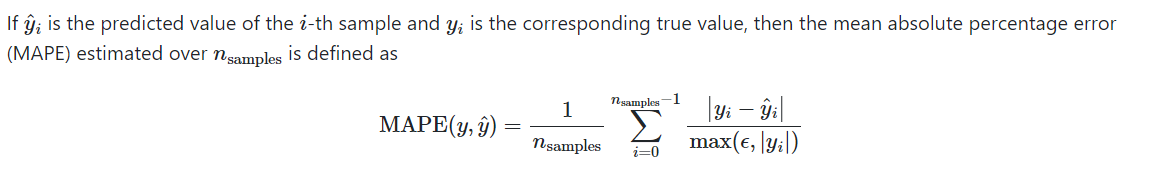

In [206]:
def Mean_absolute(y,y_hat):
  m=y.shape[0]
  an=(1/m)*np.sum(np.abs(y-y_hat)/np.max(y))
  return an

In [224]:
def main():
    n = 1500
    alpha = 0.01
    X_train, X_test, y_train, y_test = readData("/content","ex1data1.txt")#***
    X_train, y_train = scaleData(X_train, y_train)#***
    X_test, y_test = scaleData(X_test, y_test)#***
    
    print('Huấn luyện mô hình trên tập dữ liệu train')
    w = np.zeros((X_train.shape[1], 1))
    w , J_history = gradientDescent(X_train, y_train, w, alpha, n)
    print("trong so toi uu la ", w)
    
    print("hàm mất mát ", J_history[-1])
    print('train test')
    
    y_hat = np.dot(X_test, w)
    print(".. . . .. . . . . \\n\n")
    print("MSE: ", mse(y_test, y_hat))
    print('Sử dụng sklearn MSE: ', mean_squared_error(y_test, y_hat))
    
    print(".. . . .. . . . . \\n\n")
    print("độ do của R2 là ",r2score(y_test,y_hat))

    print(".. . . .. . . . . \\n\n")
    print("do độ của MAE là :", mean_absolute_error_fuc(y_test ,y_hat))
    print('Sử dụng sklearn MAE: ',mean_absolute_error(y_test,y_hat))
    
    print(".. . . .. . . . . \\n\n")
    print("do độ của MSlE là:"
    ,Mean_squared(np.abs(y_test),np.abs(y_hat)))
    print("Sử dụng sklearn MSLE",mean_squared_log_error(np.abs(y_test),np.abs(y_hat)))
    
    print(".. . . .. . . . . \\n\n")
    print("do độ của MAPE là",Mean_absolute(y_test,y_hat))
    #print("Sử dụng sklearn MAPE:",mean_absolute_percentage_error(y_test,y_hat))
if __name__ == '__main__':
    main()

Huấn luyện mô hình trên tập dữ liệu train
trong so toi uu la  [[3.26852973e-18]
 [2.92904282e-01]]
hàm mất mát  0.009790029585964002
train test
.. . . .. . . . . \n

MSE:  0.039984628925097424
Sử dụng sklearn MSE:  0.039984628925097424
.. . . .. . . . . \n

độ do của R2 là  0.496882368735869
.. . . .. . . . . \n

do độ của MAE là : 0.1566391872204504
Sử dụng sklearn MAE:  0.1566391872204504
.. . . .. . . . . \n

do độ của MSlE là: 0.02399572697029867
Sử dụng sklearn MSLE 0.02399572697029867
.. . . .. . . . . \n

do độ của MAPE là 0.2352799705406996
